In [23]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense


In [24]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()



In [25]:
# Print shapes
print("train_X shape:", train_X.shape)
print("train_y shape:", train_y.shape)
print("test_X shape:", test_X.shape)
print("test_y shape:", test_y.shape)

train_X shape: (60000, 28, 28)
train_y shape: (60000,)
test_X shape: (10000, 28, 28)
test_y shape: (10000,)


visulazing the dataset

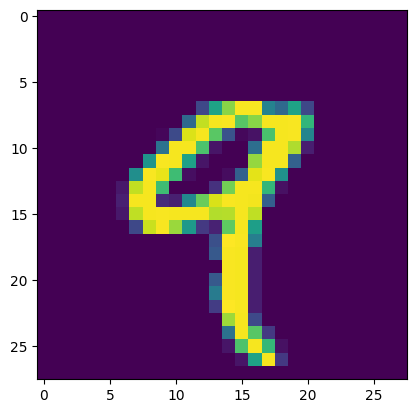

In [31]:
import matplotlib.pyplot as plt
plt.imshow(train_X[4])

Normalizing and reshaping the dataset

In [26]:
# Normalize and reshape the inputs
train_X = train_X / 255.0
test_X = test_X / 255.0
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# ✅ Correct one-hot encoding
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

Reshaping the data


Building CNN Model

In [37]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_X, train_y, epochs=5, batch_size=64, validation_split=0.1)




Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.8894 - loss: 0.3803 - val_accuracy: 0.9818 - val_loss: 0.0715
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9802 - loss: 0.0643 - val_accuracy: 0.9877 - val_loss: 0.0484
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9885 - loss: 0.0382 - val_accuracy: 0.9872 - val_loss: 0.0481
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9922 - loss: 0.0267 - val_accuracy: 0.9870 - val_loss: 0.0534
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9948 - loss: 0.0161 - val_accuracy: 0.9893 - val_loss: 0.0498


In [39]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

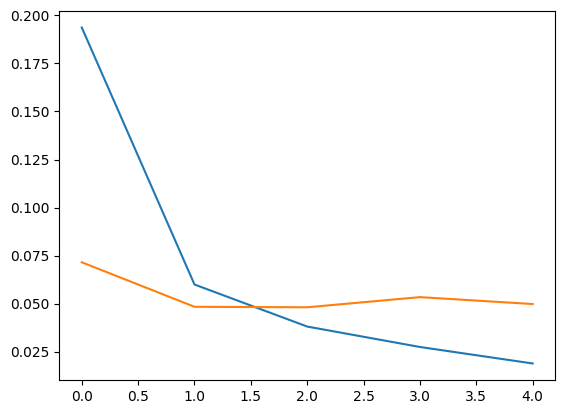

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Evaluate the Model on Test Data

In [28]:
test_loss, test_accuracy = model.evaluate(test_X, test_y)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9848 - loss: 0.0480
Test Accuracy: 0.9872999787330627


In [33]:
predictions = model.predict(test_X)  # Returns probabilities for each class


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [34]:
predictions


array([[3.09961234e-09, 6.02637158e-08, 3.82717872e-07, ...,
        9.99993145e-01, 7.29146450e-08, 4.81138704e-06],
       [3.13798694e-07, 3.00607353e-05, 9.99969304e-01, ...,
        3.48473542e-11, 1.72923819e-07, 1.15275331e-10],
       [1.48960935e-05, 9.99356210e-01, 1.33896237e-05, ...,
        3.52780888e-04, 5.29100944e-05, 7.37992195e-07],
       ...,
       [1.70677573e-13, 2.51266896e-10, 5.93758376e-10, ...,
        1.23264016e-07, 7.82484335e-07, 8.50539891e-06],
       [6.99139704e-12, 2.16376071e-12, 5.03469662e-12, ...,
        1.52016913e-10, 4.42777993e-04, 1.51290749e-08],
       [1.11071284e-10, 1.50930416e-13, 1.59852076e-10, ...,
        1.47808035e-13, 4.20694868e-10, 1.01765689e-13]], dtype=float32)

predicting different values


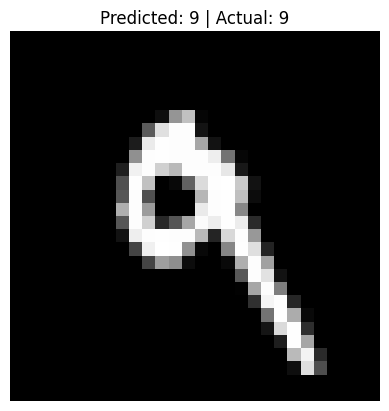

In [36]:
import matplotlib.pyplot as plt
import numpy as np

index = 7
plt.imshow(test_X[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])} | Actual: {np.argmax(test_y[index])}")
plt.axis('off')
plt.show()


In [43]:
import keras
keras.saving.save_model(model, 'my_model.keras')




In [44]:
from google.colab import files
files.download("my_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>